### Thomas Moore, Tejasvini Tummuru

# Credit Score Predictor
## Summary/Description

# Initialization and Data Cleaning

In [69]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
import seaborn as sb

In [4]:
# Import data into dataframe to start; get an idea of how it looks
df = pd.read_csv('/train.csv', low_memory=False)
test = pd.read_csv('/test.csv', low_memory=False)
print(df.shape)
print(df.dtypes)
print('--'*40)
print(test.shape)
print(test.dtypes)
df.head()

(100000, 28)
ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score   

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [5]:
# Get some statistics on null values
print('Train: \n', df.isnull().sum())
print('**'*40)
print('Test: \n', test.isnull().sum())
print('**'*40)
print('**'*40)
# Easier to read transpose
print('Train: \n', df.describe().T)
print('**'*40)
print('Test: \n', test.describe().T)

Train: 
 ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64
**************************

In [6]:
df.select_dtypes('object').describe().T
# There are a bunch of special characters and bad entries; let's fix that.

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


In [7]:
df = df.applymap(lambda x: x if x is np.NaN or not isinstance(x, str) else 
                 str(x).strip('_ ,"')).replace(['',
                                                '_',
                                                '-', 
                                                '-333333333333333333333333333'
                                                ,'nan', 
                                                '__10000__',
                                                '!@9#%8', 
                                                '#F%$D@*&8'], np.NaN)
df.select_dtypes('object').describe().T
# Much better

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10128,Langep,44
Age,100000,1728,38,2994
SSN,94428,12500,078-73-5990,8
Occupation,92938,15,Lawyer,6575
Annual_Income,100000,13487,17816.75,16
Num_of_Loan,100000,414,3,15104
Type_of_Loan,88592,6260,Not Specified,1408


In [8]:
print(df['Age'].head())
# Some negative ages; let's clean that up
df['Age'] = df.Age.str.replace('-', '')
# Have to fix up the training set too
test['Age'] = test.Age.str.replace('-', '')
print(df['Age'].head())

0      23
1      23
2    -500
3      23
4      23
Name: Age, dtype: object
0     23
1     23
2    500
3     23
4     23
Name: Age, dtype: object


As we see above, Age here is represented as dtype: object. This isn't quite right; in fact, a lot of the features in this data set have been represented as type object when they should be numerical. Let's change some of these features:

- 'Age' should be float64
- 'Annual_Income' should be float64
- 'Num_of_Loan' should be float64
- 'Num_of_Delayed_Payment' should be float64
- 'Changed_Credit_Limit' should be float64
- 'Outstanding_Debt' should be float64
- 'Credit_History_Age' should be float64
- 'Amount_invested_monthly' should be float64
- 'Monthly_Balance' should be float64

In [9]:
features_to_convert = ['Age', 
                       'Annual_Income', 
                       'Num_of_Loan', 
                       'Num_of_Delayed_Payment', 
                       'Changed_Credit_Limit', 
                       'Outstanding_Debt', 
                       'Amount_invested_monthly', 
                       'Monthly_Balance'] # we'll fix Credit_History_Age later

for feature in features_to_convert :
    uniques = df[feature].unique()
    print('Feature:', '\n',
          feature, '\n',
          uniques, '\n', 
          '--'*40, '\n')

Feature: 
 Age 
 ['23' '500' '28' ... '4808' '2263' '1342'] 
 -------------------------------------------------------------------------------- 

Feature: 
 Annual_Income 
 ['19114.12' '34847.84' '143162.64' ... '37188.1' '20002.88' '39628.99'] 
 -------------------------------------------------------------------------------- 

Feature: 
 Num_of_Loan 
 ['4' '1' '3' '967' '-100' '0' '2' '7' '5' '6' '8' '9' '1464' '622' '352'
 '472' '1017' '945' '146' '563' '341' '444' '720' '1485' '49' '737' '1106'
 '466' '728' '313' '843' '597' '617' '119' '663' '640' '92' '1019' '501'
 '1302' '39' '716' '848' '931' '1214' '186' '424' '1001' '1110' '1152'
 '457' '1433' '1187' '52' '1480' '1047' '1035' '1347' '33' '193' '699'
 '329' '1451' '484' '132' '649' '995' '545' '684' '1135' '1094' '1204'
 '654' '58' '348' '614' '1363' '323' '1406' '1348' '430' '153' '1461'
 '905' '1312' '1424' '1154' '95' '1353' '1228' '819' '1006' '795' '359'
 '1209' '590' '696' '1185' '1465' '911' '1181' '70' '816' '1369' '143'

We can see that there's still a couple of weird negative numbers here and there especially in num_of_delayed_payment. Let's fix that.

In [10]:
# We have to fix up for test set too
for feature in features_to_convert :
    # fix negatives
    df[feature] = df[feature].str.strip('-_')
    test[feature] = test[feature].str.strip('-_')
    # fix empty members
    df[feature] = df[feature].replace({'':np.nan})
    test[feature] = test[feature].replace({'':np.nan})
    # convert types
    df[feature] = df[feature].astype('float64')
    test[feature] = test[feature].astype('float64')

# Let's check and see if we successfully converted the data types
for feature in features_to_convert:
    print('train dataframe:', feature, '\n',
          df[feature].dtype)
    print('test dataframe :', feature, '\n',
          test[feature].dtype, '\n')
    

train dataframe: Age 
 float64
test dataframe : Age 
 float64 

train dataframe: Annual_Income 
 float64
test dataframe : Annual_Income 
 float64 

train dataframe: Num_of_Loan 
 float64
test dataframe : Num_of_Loan 
 float64 

train dataframe: Num_of_Delayed_Payment 
 float64
test dataframe : Num_of_Delayed_Payment 
 float64 

train dataframe: Changed_Credit_Limit 
 float64
test dataframe : Changed_Credit_Limit 
 float64 

train dataframe: Outstanding_Debt 
 float64
test dataframe : Outstanding_Debt 
 float64 

train dataframe: Amount_invested_monthly 
 float64
test dataframe : Amount_invested_monthly 
 float64 

train dataframe: Monthly_Balance 
 float64
test dataframe : Monthly_Balance 
 float64 



Now let's go ahead and try to clean up 'Credit_History_Age'. Since this feature is trying to convey a duration of time, it would be easier for our model to handle it if the feature was numerical instead of categorical. 

In [11]:
df['Credit_History_Age'].head()

0    22 Years and 1 Months
1                      NaN
2    22 Years and 3 Months
3    22 Years and 4 Months
4    22 Years and 5 Months
Name: Credit_History_Age, dtype: object

As we can see, the credit history age is represented as years and months. Since the smaller unit is months, we will convert this feature into a numerical feature representing the number of months of credit history.

In [12]:
# Let's split up Credit_History_Age

split = [str(age).split(' ') for age in df['Credit_History_Age']]
year = [s[0] for s in split]
# now let's convert year into months
year = [float(x) * 12 for x in year]

# now let's convert the months over
month = []
for item in split :
    if len(item) > 1 :
        month.append(item[3]) # for regular entries
    else :
        month.append(item[0]) # for nan entries

combined_age = [float(year[i]) + float(month[i]) for i in range(len(split))]
df['Credit_History_Age'] = combined_age
df['Credit_History_Age'].head()

0    265.0
1      NaN
2    267.0
3    268.0
4    269.0
Name: Credit_History_Age, dtype: float64

In [33]:
# Let's have a quick check to see that our data is nice and clean.
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,500.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


Our data has been cleaned up, looks good, and is ready to be worked on.

# Data Exploration

Now lets explore the data a bit more and see how our data is distributed in terms of good, standard, and poor credit scores. 

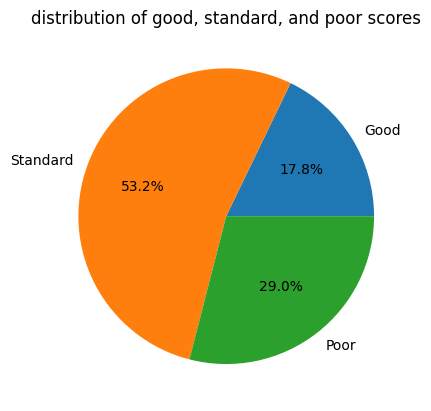

In [13]:
data = [df[df['Credit_Score']=='Good']['Credit_Score'].count(),
        df[df['Credit_Score']=='Standard']['Credit_Score'].count(),
       df[df['Credit_Score']=='Poor']['Credit_Score'].count()]
categories = ['Good', 'Standard', 'Poor']
plt.pie(data,
        labels=categories,
        autopct='%1.1f%%')
plt.title('distribution of good, standard, and poor scores')
plt.show()

Through the pie chart, we are able to see the distribution of the scores and notice that most people have a standard credit score. Now lets have a look at how credit score changes with age

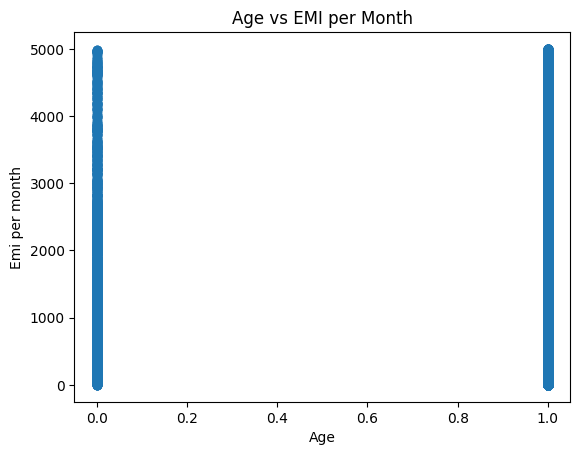

In [50]:
plt.scatter([df['Age']<100], df['Outstanding_Debt'])
plt.title("Age vs EMI per Month")
plt.xlabel("Age")
plt.ylabel("Emi per month")
plt.show()

Here are histograms to show what the data distributions look like overall. From this data I wanted to see what the counts of each type of data is to determine which features would be relative to keep and which features have the most varied/distributed data. 

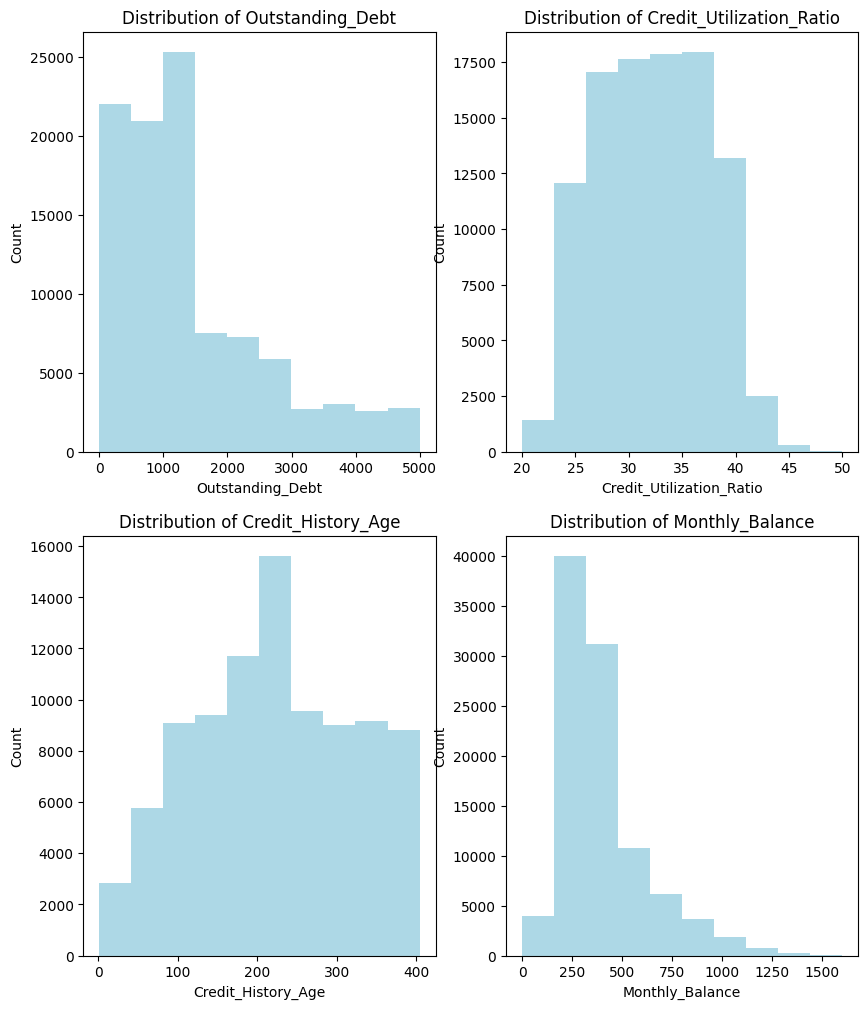

In [15]:
fig, axes = plt.subplots(2, 2, figsize = (10, 12))
axes[0, 0].hist(df['Outstanding_Debt'],
                    color = 'lightblue')
axes[0, 0].set_title('Distribution of Outstanding_Debt')
axes[0, 0].set_xlabel('Outstanding_Debt')
axes[0, 0].set_ylabel('Count')
axes[0, 1].hist(df['Credit_Utilization_Ratio'],
                    color = 'lightblue')
axes[0, 1].set_title('Distribution of Credit_Utilization_Ratio')
axes[0, 1].set_xlabel('Credit_Utilization_Ratio')
axes[0, 1].set_ylabel('Count')
axes[1, 0].hist(df['Credit_History_Age'],
                    color = 'lightblue')
axes[1, 0].set_title('Distribution of Credit_History_Age')
axes[1, 0].set_xlabel('Credit_History_Age')
axes[1, 0].set_ylabel('Count')
axes[1, 1].hist(df['Monthly_Balance'],
                    color = 'lightblue')
axes[1, 1].set_title('Distribution of Monthly_Balance')
axes[1, 1].set_xlabel('Monthly_Balance')
axes[1, 1].set_ylabel('Count')
plt.show()

Here different box plots were graphed to see how the data varied within different occupations. We predicted that different occupations would have much different Credit Utilization Scores and Monthly Investments and the boxplots help wee how much different each occupation is. 

['Lawyer', 'Architect', 'Writer', 'Teacher', 'Scientist', 'Developer', 'Musician', 'Doctor', 'Mechanic', 'Journalist', 'Entrepreneur', 'Engineer', 'Media_Manager', 'Accountant', 'Manager']
float64


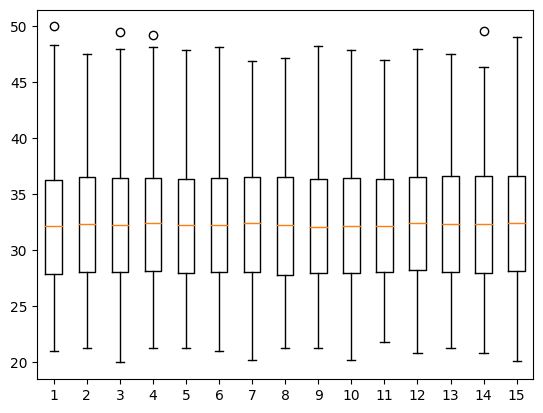

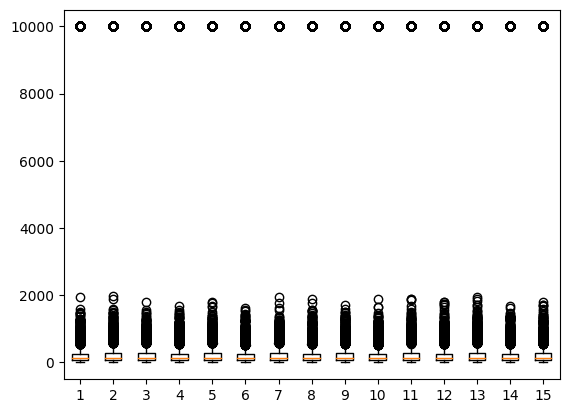

[ 98.67440994 150.0597343  618.20239125 ... 187.35596861 240.87379807
 115.18498444]
[39.96268501363903, 40.7121865299296, 30.201657705809275, 26.33331042687101, 35.2754365244368, 36.62479126183764, 31.58098966831768, 32.200508995391914, 31.98371000755867, 31.803134495092277, 42.64578489930634, 40.902517150451615, 41.98016961054943, 26.94756515223988, 29.18791265416669, 33.07588356651339, 38.15374125597254, 23.17983273627976, 37.24021434251173, 36.52748004014412, 34.125305925956305, 31.978873515820705, 41.687213348432586, 31.401516359038077, 34.26155637445099, 26.71579704085419, 39.77628576926387, 40.605388381855605, 39.43016630693703, 26.050884837843643, 24.07007993001725, 27.926609653819963, 31.31743280165792, 28.643128748008227, 24.557218399385608, 30.561750479920683, 35.7261306876056, 37.9726547797455, 34.81301083926292, 33.015928099564874, 26.728958154089742, 37.84472128823233, 27.228568017436587, 38.05162517975845, 39.37829032617325, 29.447968449801103, 30.14370367809759, 35.2859

In [87]:
occupations = df['Occupation'].tolist()
ocset = set(occupations)
listoc = list(ocset)
del listoc[0]
print(listoc)
print(df['Credit_Utilization_Ratio'].dtype)
all_oc_cr = []
all_oc_mn = []
# list_temp = df.query("Occupation=='Doctor'")['Monthly_Balance'].tolist()
# print(list_temp)
for i in range(len(listoc)):
  # print(listoc[i])
  list_temp = df.query(f"Occupation=='{listoc[i]}'")['Credit_Utilization_Ratio'].tolist() #Credit_Utilization_Ratio
  # print(list_temp)
  all_oc_cr.append(list_temp)
  # print(all_oc)
plt.boxplot(all_oc_cr)
plt.show()
for i in range(len(listoc)):
  # print(listoc[i])
  list_temp = df.query(f"Occupation=='{listoc[i]}'")['Amount_invested_monthly'].tolist() #Credit_Utilization_Ratio
  # print(list_temp)
  arr = np.array(list_temp)
  arr = arr[~np.isnan(arr)]
  arr.tolist()
  all_oc_mn.append(arr)
  # print(all_oc)
plt.boxplot(all_oc_mn)
plt.show()
print(all_oc_mn[0])
print(all_oc_cr[0])

Pie charts were made to see how the distribution of credit scores varies within each occupation as well to see if different occupations have different score distributions. 

<ipython-input-47-66f2c7cb840c>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = [df[df['Occupation']==listoc[i]][df['Credit_Score']=='Good']['Credit_Score'].count(),
<ipython-input-47-66f2c7cb840c>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Occupation']==listoc[i]][df['Credit_Score']=='Standard']['Credit_Score'].count(),
<ipython-input-47-66f2c7cb840c>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Occupation']==listoc[i]][df['Credit_Score']=='Poor']['Credit_Score'].count()]


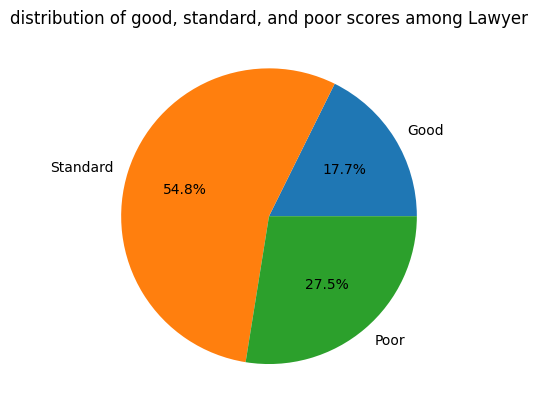

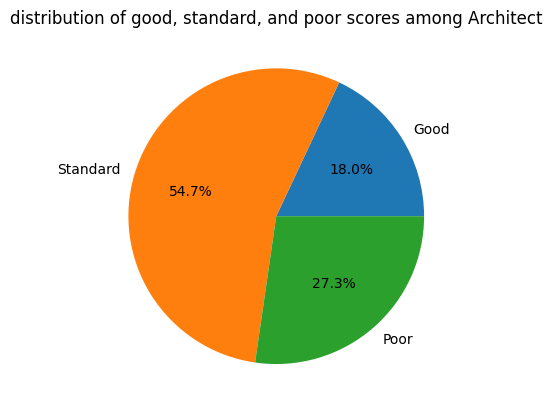

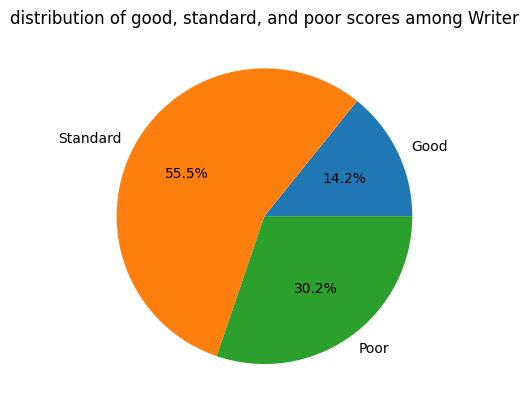

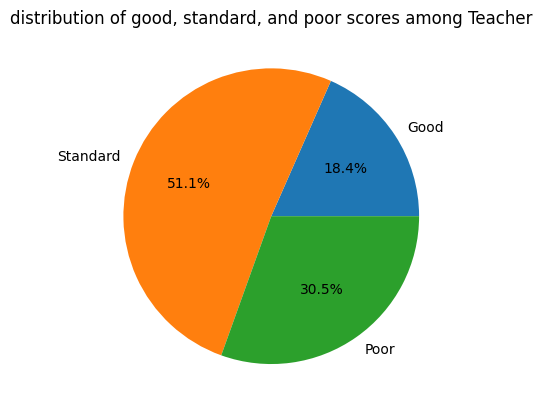

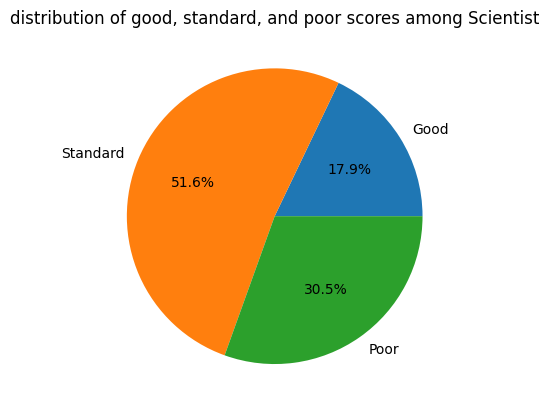

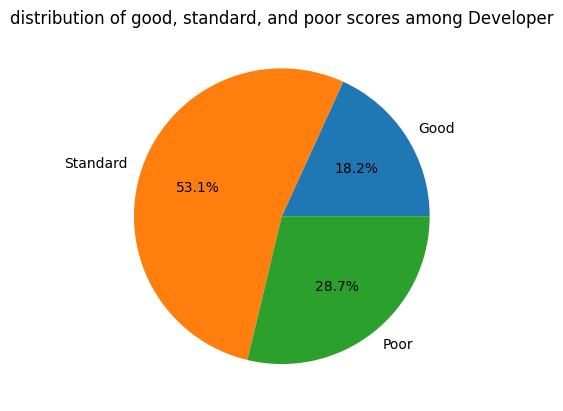

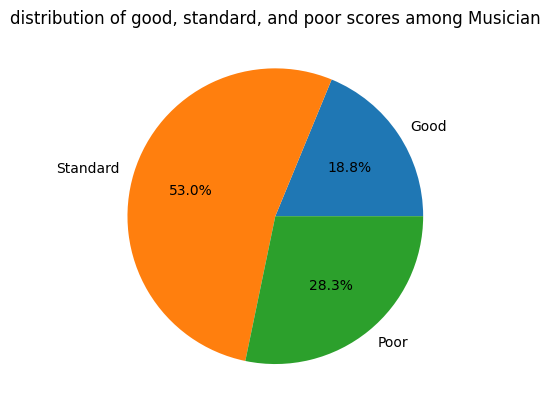

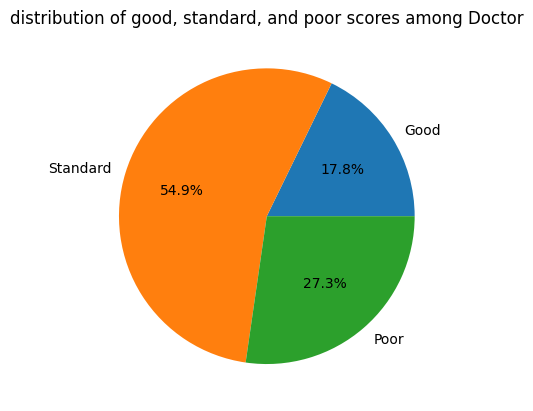

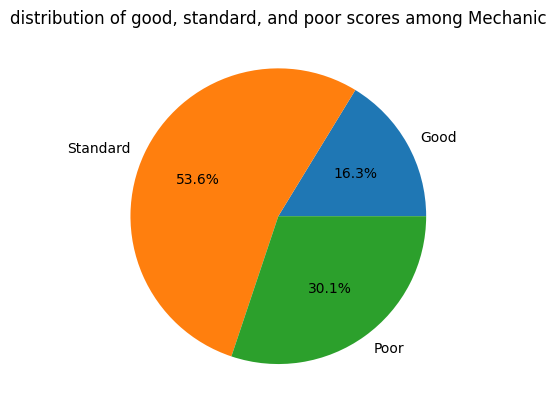

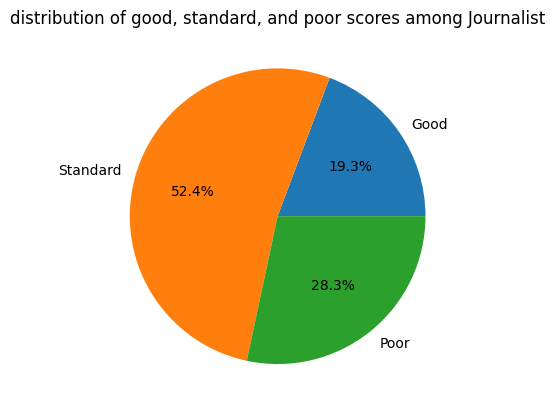

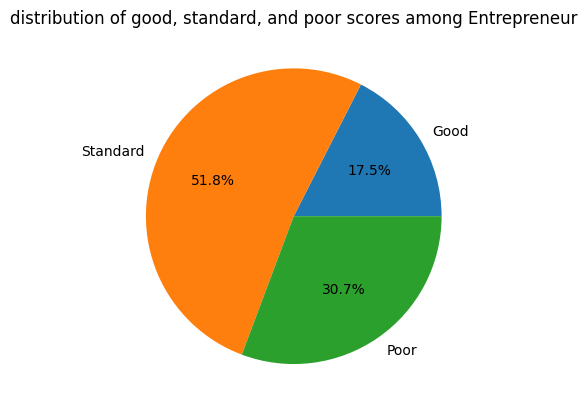

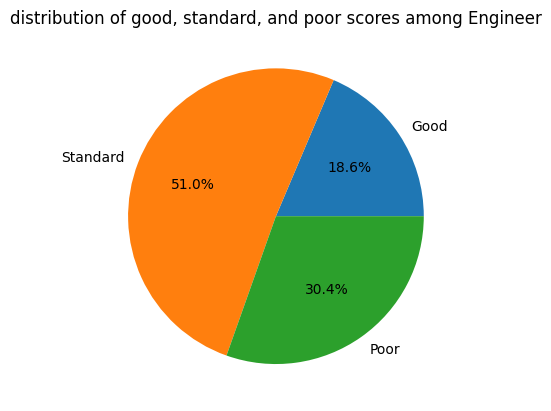

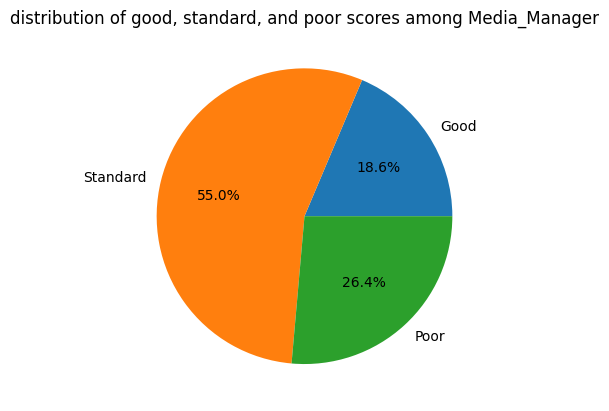

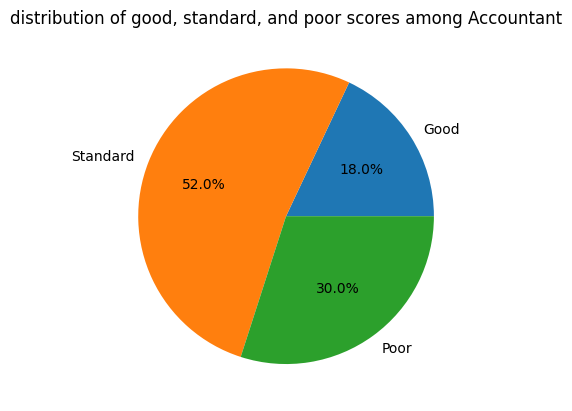

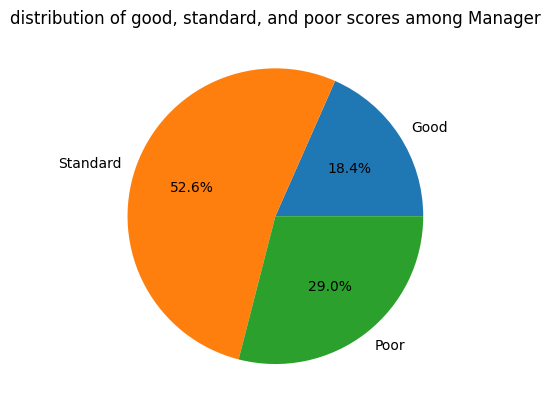

In [47]:

for i in range(len(listoc)):
  data = [df[df['Occupation']==listoc[i]][df['Credit_Score']=='Good']['Credit_Score'].count(),
        df[df['Occupation']==listoc[i]][df['Credit_Score']=='Standard']['Credit_Score'].count(),
       df[df['Occupation']==listoc[i]][df['Credit_Score']=='Poor']['Credit_Score'].count()]
  categories = ['Good', 'Standard', 'Poor']
  plt.pie(data,
          labels=categories,
          autopct='%1.1f%%')
  plt.title('distribution of good, standard, and poor scores among ' + listoc[i])
  plt.show()

Lastly, we made a correlation map to see which data has the most correlationb and should be compared/kept and which relationships can be explored further. 

<ipython-input-73-02a0207e2fc3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sb.heatmap(df.corr(), annot=False)


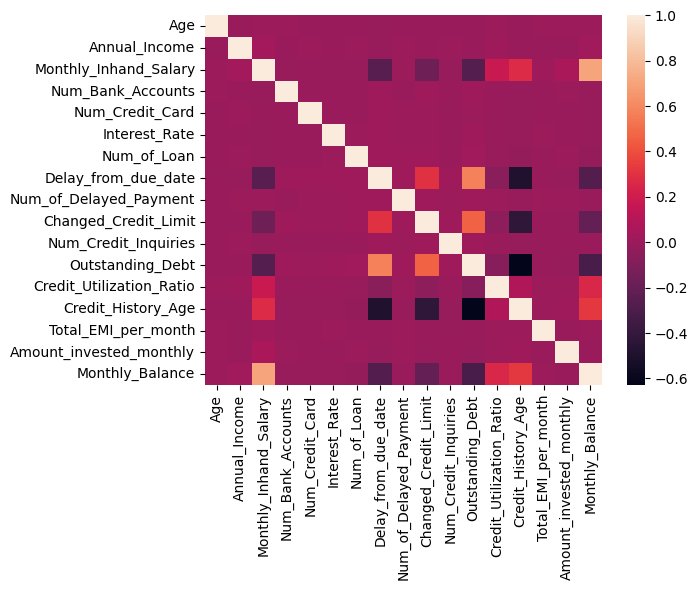

In [73]:
# print(df.corr())
dataplot = sb.heatmap(df.corr(), annot=False)
plt.show()